In [169]:
import numpy as np
import pandas as pd

## Filter data to specific station

In [170]:
data=pd.read_csv("/Users/jchen056/Data/hourly_data_aggregated.csv")
data.drop(columns=['Unnamed: 0'],axis=0,inplace=True)
data.head()

,station_complex,borough,date,hour,month,weekdays,num_lines,ridership,TMAX,TMIN,PRCP,avg_T
0,1 Av (L),M,2022-02-01,0,2,1,1,124,36,23,0.0,29.5
1,1 Av (L),M,2022-02-01,1,2,1,1,28,36,23,0.0,29.5
2,1 Av (L),M,2022-02-01,2,2,1,1,38,36,23,0.0,29.5
3,1 Av (L),M,2022-02-01,3,2,1,1,14,36,23,0.0,29.5
4,1 Av (L),M,2022-02-01,4,2,1,1,26,36,23,0.0,29.5


In [140]:
data['ridership'].min()

1

In [187]:
data['weekdays'].min()

0

In [141]:
len(data[data['borough']=='M']['station_complex'].unique())
len(data['station_complex'].unique())

425

In [142]:
stationA=data[data['station_complex']=='116 St-Columbia University (1)']
stationA.head(2)

,station_complex,borough,date,hour,month,weekdays,num_lines,ridership,TMAX,TMIN,PRCP,avg_T
200246,116 St-Columbia University (1),M,2022-02-01,0,2,1,1,82,36,23,0.0,29.5
200247,116 St-Columbia University (1),M,2022-02-01,1,2,1,1,26,36,23,0.0,29.5


In [143]:
stationA.columns

Index(['station_complex', 'borough', 'date', 'hour', 'month', 'weekdays',
       'num_lines', 'ridership', 'TMAX', 'TMIN', 'PRCP', 'avg_T'],
      dtype='object')

In [144]:
stationA_filtered=stationA[['hour', 'month', 'weekdays','ridership','PRCP', 'avg_T']].copy()
stationA_filtered.head()

,hour,month,weekdays,ridership,PRCP,avg_T
200246,0,2,1,82,0.0,29.5
200247,1,2,1,26,0.0,29.5
200248,2,2,1,4,0.0,29.5
200249,3,2,1,4,0.0,29.5
200250,4,2,1,12,0.0,29.5


In [145]:
data_w_dummies=pd.get_dummies(stationA_filtered,
                              columns=['hour','month','weekdays'],
                             drop_first=True)
data_w_dummies.head()

,ridership,PRCP,avg_T,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,...,month_9,month_10,month_11,month_12,weekdays_1,weekdays_2,weekdays_3,weekdays_4,weekdays_5,weekdays_6
200246,82,0.0,29.5,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
200247,26,0.0,29.5,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
200248,4,0.0,29.5,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
200249,4,0.0,29.5,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
200250,12,0.0,29.5,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [146]:
from sklearn.model_selection import train_test_split
y=data_w_dummies['ridership']
x=data_w_dummies[[i for i in data_w_dummies.columns if i!='ridership']]
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42)

In [151]:
max(y_test)

4428

In [200]:
X_test[]

,PRCP,avg_T,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,...,month_9,month_10,month_11,month_12,weekdays_1,weekdays_2,weekdays_3,weekdays_4,weekdays_5,weekdays_6
206182,0.00,59.5,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
210018,0.00,41.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
212112,0.00,69.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
202473,0.00,51.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
200415,0.00,37.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202031,0.85,46.5,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
206338,0.14,59.5,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
206441,0.00,54.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
201530,0.00,28.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## ML models
- linear regression: multiple linear regression, ridge, lasso, and elastic net
- polynomial regression:

In [147]:
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet, Lasso
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures
#random forest
from sklearn.ensemble import RandomForestRegressor
#svr
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR#quadratic running time,  
#hard to scale to datasets with more than a couple of 10000 samples
from sklearn.linear_model import SGDRegressor#Stochastic Gradient Descent
from sklearn.ensemble import GradientBoostingRegressor

In [148]:
# try linear regression
linear_regression=LinearRegression()
linear_regression.fit(X_train,y_train)

y_pred=linear_regression.predict(X_test)
print("r^2 test: %.3f"%r2_score(y_test,y_pred))
print("mean squared error: %.2f"%mean_squared_error(y_test,y_pred))

r^2 test: 0.655
mean squared error: 99190.41


In [149]:
r2_score(y_train,y_train_pred)

0.6493662509556781

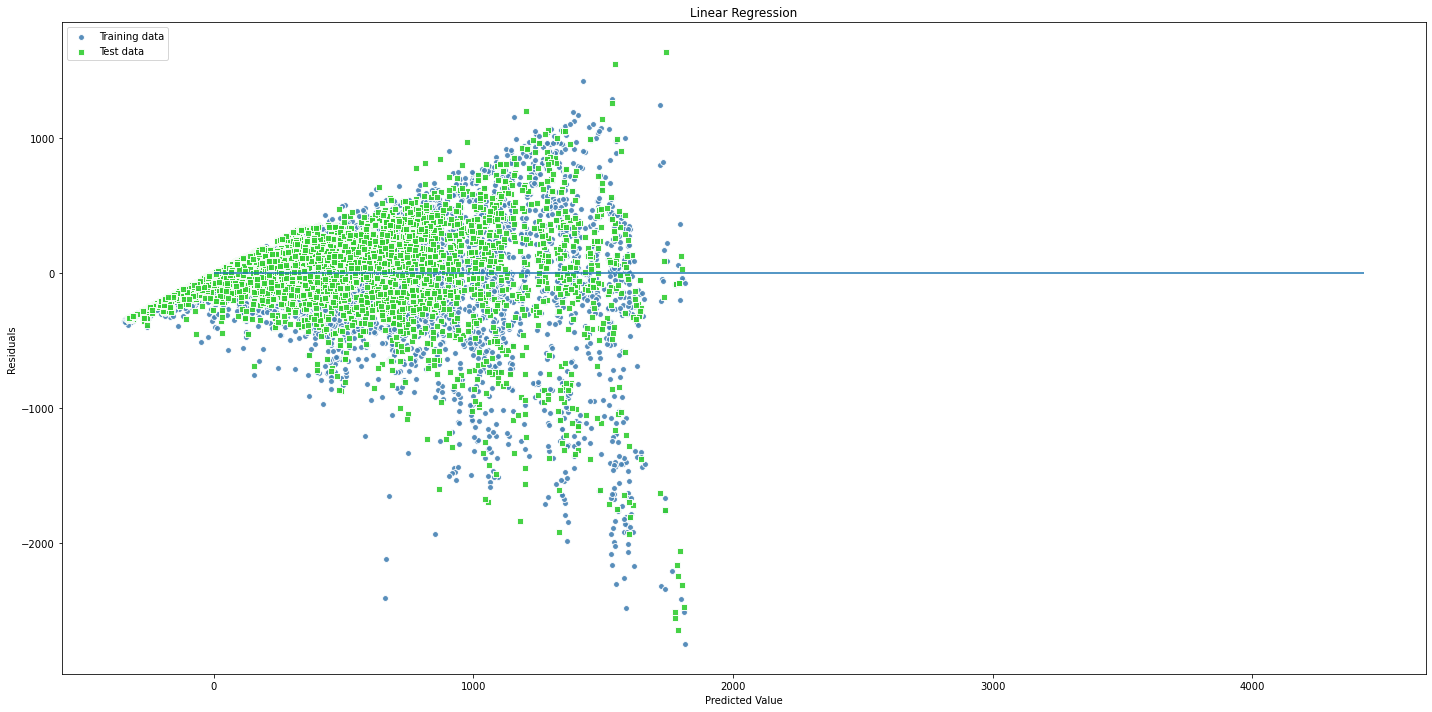

In [150]:
import matplotlib.pyplot as plt
y_train_pred=linear_regression.predict(X_train)
plt.scatter(y_train_pred,y_train_pred-y_train,
           c="steelblue",edgecolor='white',marker='o',s=35,alpha=0.9,label="Training data")
plt.scatter(y_pred,y_pred-y_test,
           c="limegreen",edgecolor='white',marker='s',s=35,alpha=0.9,label="Test data")
plt.xlabel("Predicted Value")
plt.ylabel("Residuals")
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=0,xmax=max(y_test))
plt.title("Linear Regression")
plt.tight_layout()

In [153]:
# plt.rcParams["figure.figsize"] = (20,10)
# fig, axs = plt.subplots(2, 3,sharey=True,sharex=True)
# axs[0,0].scatter(y_train_pred,y_train_pred-y_train,
#            c="steelblue",edgecolor='white',marker='o',s=35,alpha=0.9,label="Training data")
# axs[0,0].scatter(y_pred,y_pred-y_test,
#            c="limegreen",edgecolor='white',marker='s',s=35,alpha=0.9,label="Test data")
# axs[0,0].hlines(y=0,xmin=0,xmax=max(y_test))
# axs[0,0].set_ylabel("Residual")
# axs[0,0].legend(loc='upper left')
# axs[0,0].set_title("Linear Regression")

In [154]:
# try ridge regression 
ridge_regression=Ridge(alpha=0.01)
ridge_regression.fit(X_train,y_train)

y_pred=ridge_regression.predict(X_test)
print("r^2 test: %.3f"%r2_score(y_test,y_pred))
print("mean squared error: %.2f"%mean_squared_error(y_test,y_pred))

r^2 test: 0.655
mean squared error: 99190.03


In [155]:
lasso=Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)
print("r^2 test: %.3f"%r2_score(y_test,y_pred))
print("mean squared error: %.2f"%mean_squared_error(y_test,y_pred))

r^2 test: 0.655
mean squared error: 99182.23


In [156]:
# elanet=ElasticNet(alpha=1,l1_ratio=1)
# elanet.fit(X_train,y_train)
# y_pred=elanet.predict(X_test)
# print("r^2 test: %.3f"%r2_score(y_test,y_pred))
# print("mean squared error: %.2f"%mean_squared_error(y_test,y_pred))

In [157]:
#try polynomial regression
poly_regression=LinearRegression()

poly=PolynomialFeatures(degree=2)
X_train_modified=poly.fit_transform(X_train)

poly_regression.fit(X_train_modified,y_train)

y_pred=poly_regression.predict(poly.fit_transform(X_test))
print("r^2 test: %.3f"%r2_score(y_test,y_pred))
print("mean squared error: %.2f"%mean_squared_error(y_test,y_pred))

r^2 test: 0.771
mean squared error: 65948.69


In [158]:
#try random forest regression
forest = RandomForestRegressor(n_estimators=100,
                                  random_state=0)
forest.fit(X_train,y_train)
y_pred=forest.predict(X_test)
print("r^2 test: %.3f"%r2_score(y_test,y_pred))
print("mean squared error: %.2f"%mean_squared_error(y_test,y_pred))

r^2 test: 0.705
mean squared error: 84810.67


In [32]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators' : [50,100],
#     'criterion': ["squared_error", "absolute_error", "friedman_mse", "poisson"],
    'max_depth': [5, 10],
}
gridmodel = GridSearchCV(RandomForestRegressor(),
                         param_grid=params, cv=10)
gridmodel.fit(X_train,y_train)
print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("best parameters: {}".format(gridmodel.best_params_))

best mean cross-validation score: 0.668
best parameters: {'max_depth': 10, 'n_estimators': 50}


In [159]:
# sgd: stochastic gradient descent
svr=make_pipeline(StandardScaler(), SGDRegressor(max_iter=2000, tol=1e-3))
svr.fit(X_train,y_train)
y_pred=svr.predict(X_test)
print("r^2 test: %.3f"%r2_score(y_test,y_pred))
print("mean squared error: %.2f"%mean_squared_error(y_test,y_pred))

r^2 test: 0.654
mean squared error: 99551.90


In [160]:
# boosting regressor
boosting_r=GradientBoostingRegressor(random_state=0)
boosting_r.fit(X_train,y_train)
y_pred=boosting_r.predict(X_test)
print("r^2 test: %.3f"%r2_score(y_test,y_pred))
print("mean squared error: %.2f"%mean_squared_error(y_test,y_pred))

r^2 test: 0.702
mean squared error: 85640.15


In [161]:
# combine everything together
def ml_for_each_station(station_name):
    stationA=data[data['station_complex']==station_name]
    stationA_filtered=stationA[['hour', 'month', 'weekdays','ridership','PRCP', 'avg_T']].copy()
    data_w_dummies=pd.get_dummies(stationA_filtered,
                              columns=['hour','month','weekdays'],
                             drop_first=True)
    
    y=data_w_dummies['ridership']
    x=data_w_dummies[[i for i in data_w_dummies.columns if i!='ridership']]
    X_train, X_test, y_train, y_test = train_test_split(
        x, y, test_size=0.3, random_state=42)
    
    models=[]
    r2_scores_test=[]
    mses_test=[]
    r2_scores_train=[]
    mses_train=[]
    plt.rcParams["figure.figsize"] = (20,10)
    fig, axs = plt.subplots(2, 3,sharey=True,sharex=True)
    
    linear_regression=LinearRegression()
    linear_regression.fit(X_train,y_train)
    y_pred1=linear_regression.predict(X_test)
    models.append('Linear Regression')
    r2_scores_test.append(r2_score(y_test,y_pred1))#r^2 score test for model1
    mses_test.append(mean_squared_error(y_test,y_pred1))#mse test for model1
    y_train_pred=linear_regression.predict(X_train)
    r2_scores_train.append(r2_score(y_train,y_train_pred))
    mses_train.append(mean_squared_error(y_train,y_train_pred))

    axs[0,0].scatter(y_train_pred,y_train_pred-y_train,
           c="steelblue",edgecolor='white',marker='o',s=35,alpha=0.9,label="Training data")
    axs[0,0].scatter(y_pred1,y_pred1-y_test,
               c="limegreen",edgecolor='white',marker='s',s=35,alpha=0.9,label="Test data")
    axs[0,0].hlines(y=0,xmin=0,xmax=max(y_test))
    axs[0,0].set_ylabel("Residuals")
    axs[0,0].legend(loc='upper left')
    axs[0,0].set_title("Linear Regression")
    
    ridge_regression=Ridge()
    ridge_regression.fit(X_train,y_train)
    y_pred2=ridge_regression.predict(X_test)
    models.append('Ridge Regression')
    r2_scores_test.append(r2_score(y_test,y_pred2))
    mses_test.append(mean_squared_error(y_test,y_pred2))
    y_train_pred2=ridge_regression.predict(X_train)
    r2_scores_train.append(r2_score(y_train,y_train_pred2))
    mses_train.append(mean_squared_error(y_train,y_train_pred2))
    
    axs[0,1].scatter(y_train_pred2,y_train_pred2-y_train,
           c="steelblue",edgecolor='white',marker='o',s=35,alpha=0.9,label="Training data")
    axs[0,1].scatter(y_pred2,y_pred2-y_test,
               c="limegreen",edgecolor='white',marker='s',s=35,alpha=0.9,label="Test data")
    axs[0,1].hlines(y=0,xmin=0,xmax=max(y_test))
    axs[0,1].legend(loc='upper left')
    axs[0,1].set_title("Ridge Regression")
    
    lasso=Lasso()
    lasso.fit(X_train,y_train)
    y_pred3=lasso.predict(X_test)
    models.append('LASSO Regression')
    r2_scores_test.append(r2_score(y_test,y_pred3))
    mses_test.append(mean_squared_error(y_test,y_pred3))
    y_train_pred3=lasso.predict(X_train)
    r2_scores_train.append(r2_score(y_train,y_train_pred3))
    mses_train.append(mean_squared_error(y_train,y_train_pred3))
    axs[0,2].scatter(y_train_pred3,y_train_pred3-y_train,
           c="steelblue",edgecolor='white',marker='o',s=35,alpha=0.9,label="Training data")
    axs[0,2].scatter(y_pred3,y_pred3-y_test,
               c="limegreen",edgecolor='white',marker='s',s=35,alpha=0.9,label="Test data")
    axs[0,2].hlines(y=0,xmin=0,xmax=max(y_test))
    axs[0,2].legend(loc='upper left')
    axs[0,2].set_title("Lasso Regression")
    
    poly_regression=LinearRegression()
    poly=PolynomialFeatures(degree=2)
    X_train_modified=poly.fit_transform(X_train)
    poly_regression.fit(X_train_modified,y_train)
    y_pred4=poly_regression.predict(poly.fit_transform(X_test))
    models.append('Quadratic Regression')
    r2_scores_test.append(r2_score(y_test,y_pred4))
    mses_test.append(mean_squared_error(y_test,y_pred4))
    y_train_pred4=poly_regression.predict(poly.fit_transform(X_train))
    r2_scores_train.append(r2_score(y_train,y_train_pred4))
    mses_train.append(mean_squared_error(y_train,y_train_pred4))
    axs[1,0].scatter(y_train_pred4,y_train_pred4-y_train,
           c="steelblue",edgecolor='white',marker='o',s=35,alpha=0.9,label="Training data")
    axs[1,0].scatter(y_pred4,y_pred4-y_test,
               c="limegreen",edgecolor='white',marker='s',s=35,alpha=0.9,label="Test data")
    axs[1,0].hlines(y=0,xmin=0,xmax=max(y_test))
    axs[1,0].set_ylabel("Residuals")
    axs[1,0].legend(loc='upper left')
    axs[1,0].set_title("Quadratic Regression")
    
    forest = RandomForestRegressor(n_estimators=100,
                                  random_state=0)
    forest.fit(X_train,y_train)
    y_pred5=forest.predict(X_test)
    models.append('Random Forest Regression')
    r2_scores_test.append(r2_score(y_test,y_pred5))
    mses_test.append(mean_squared_error(y_test,y_pred5))
    y_train_pred5=forest.predict(X_train)
    r2_scores_train.append(r2_score(y_train,y_train_pred5))
    mses_train.append(mean_squared_error(y_train,y_train_pred5))
    axs[1,1].scatter(y_train_pred5,y_train_pred5-y_train,
           c="steelblue",edgecolor='white',marker='o',s=35,alpha=0.9,label="Training data")
    axs[1,1].scatter(y_pred5,y_pred5-y_test,
               c="limegreen",edgecolor='white',marker='s',s=35,alpha=0.9,label="Test data")
    axs[1,1].hlines(y=0,xmin=0,xmax=max(y_test))
    axs[1,1].set_xlabel("Predicted values")
    axs[1,1].legend(loc='upper left')
    axs[1,1].set_title("Random Forest Regression")
    
    boosting_r=GradientBoostingRegressor(random_state=0)
    boosting_r.fit(X_train,y_train)
    y_pred6=boosting_r.predict(X_test)
    models.append('Gradient Boosting Regression')
    r2_scores_test.append(r2_score(y_test,y_pred6))
    mses_test.append(mean_squared_error(y_test,y_pred6))
    y_train_pred6=forest.predict(X_train)
    r2_scores_train.append(r2_score(y_train,y_train_pred6))
    mses_train.append(mean_squared_error(y_train,y_train_pred6))
    axs[1,2].scatter(y_train_pred6,y_train_pred6-y_train,
           c="steelblue",edgecolor='white',marker='o',s=35,alpha=0.9,label="Training data")
    axs[1,2].scatter(y_pred6,y_pred6-y_test,
               c="limegreen",edgecolor='white',marker='s',s=35,alpha=0.9,label="Test data")
    axs[1,2].hlines(y=0,xmin=0,xmax=max(y_test))
    axs[1,2].legend(loc='upper left')
    axs[1,2].set_title("Gradient Boosting Regression")
    fig.suptitle("ML models for "+station_name)
    return list(zip(models,r2_scores_train,mses_train,r2_scores_test,mses_test)),fig

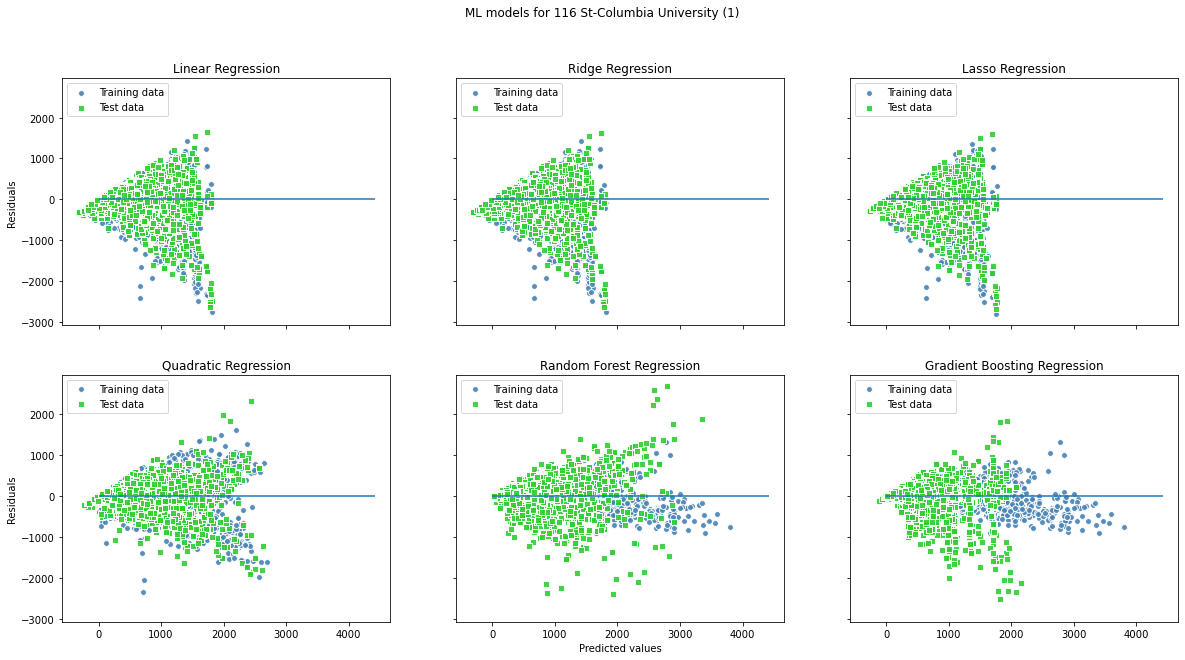

In [162]:
station_ml_scores,fig=ml_for_each_station('116 St-Columbia University (1)')

In [163]:
ml_df=pd.DataFrame(np.zeros((len(data['station_complex'].unique()),6)),
                    columns=['Linear Regression', 'Ridge Regression', 'LASSO Regression',
       'Quadratic Regression', 'Random Forest Regression',
       'Gradient Boosting Regression'],index=data['station_complex'].unique()
                 )
ml_df.head()

,Linear Regression,Ridge Regression,LASSO Regression,Quadratic Regression,Random Forest Regression,Gradient Boosting Regression
1 Av (L),0.0,0.0,0.0,0.0,0.0,0.0
103 St (1),0.0,0.0,0.0,0.0,0.0,0.0
103 St (6),0.0,0.0,0.0,0.0,0.0,0.0
"103 St (B,C)",0.0,0.0,0.0,0.0,0.0,0.0
103 St-Corona Plaza (7),0.0,0.0,0.0,0.0,0.0,0.0


In [166]:
# for station in data['station_complex'].unique():
#     station_ml_scores,fig=ml_for_each_station(station)
#     fig.savefig("visualizations/station_ml_scores/"+station.split('/')[0]+'.png')
#     ml_df.loc[station]=[r2 for _,_,_,r2,_ in station_ml_scores]

In [ ]:
# fig.savefig("visualizations/station_ml_scores/"+'116 St-Columbia University (1)'+'.png')

In [167]:
ml_df.to_csv("ml_score.csv")

In [168]:
ml_df.mean(axis=0)

Linear Regression               0.642765
Ridge Regression                0.642766
LASSO Regression                0.597844
Quadratic Regression            0.767731
Random Forest Regression        0.696036
Gradient Boosting Regression    0.696599
dtype: float64

In [173]:
data['station_complex'].unique()
data.head()

,station_complex,borough,date,hour,month,weekdays,num_lines,ridership,TMAX,TMIN,PRCP,avg_T
0,1 Av (L),M,2022-02-01,0,2,1,1,124,36,23,0.0,29.5
1,1 Av (L),M,2022-02-01,1,2,1,1,28,36,23,0.0,29.5
2,1 Av (L),M,2022-02-01,2,2,1,1,38,36,23,0.0,29.5
3,1 Av (L),M,2022-02-01,3,2,1,1,14,36,23,0.0,29.5
4,1 Av (L),M,2022-02-01,4,2,1,1,26,36,23,0.0,29.5


In [177]:
# for station in data['station_complex'].unique():
#     station_data=data[data['station_complex']==station]
#     station_data_filtered=station_data[['hour', 'month', 'weekdays','ridership','PRCP', 'avg_T']].copy()
#     data_w_dummies=pd.get_dummies(station_data_filtered,
#                               columns=['hour','month','weekdays'],
#                              drop_first=True)
#     data_w_dummies.to_csv('Data/ML_data/'+station.split('/')[0]+'.csv')

In [180]:
for station in data['station_complex'].unique():
    print(station)
    station_data=pd.read_csv('Data/ML_data/'+station.split('/')[0]+'.csv')
    station_data.drop(columns=['Unnamed: 0'],axis=0,inplace=True)
    break

1 Av (L)


In [221]:
#weekdays encoding
['Mon','Tue','Wed','Thr','Fri','Sat','Sun'].index('Tue')

# input_data=pd.DataFrame(np.zeros((1,5)),
#     columns=['hour', 'month', 'weekdays','PRCP', 'avg_T'])
# input_data.loc[0]=[7,11,3,0,70]
# input_data.hour=input_data.hour.astype(int)
# input_data.month=input_data.month.astype(int)
# input_data.weekdays=input_data.weekdays.astype(int)
# input_data

1

In [222]:
input_data=pd.DataFrame(np.zeros((1,42)),
                       columns=['PRCP', 'avg_T', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'weekdays_1',
       'weekdays_2', 'weekdays_3', 'weekdays_4', 'weekdays_5', 'weekdays_6'])
input_data.loc[0,'PRCP']=0.1
input_data.loc[0,'avg_T']=70
if 'hour_'+str(7) in input_data.columns:
    input_data.loc[0,'hour_'+str(7)]=1
if 'month_'+str(11) in input_data.columns:
    input_data.loc[0,'month_'+str(11)]=1
if 'weekdays_'+str(4) in input_data.columns:
    input_data.loc[0,'weekdays_'+str(4)]=1
    
input_data

,PRCP,avg_T,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,...,month_9,month_10,month_11,month_12,weekdays_1,weekdays_2,weekdays_3,weekdays_4,weekdays_5,weekdays_6
0,0.1,70.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [227]:
boosting_r.predict(input_data.values)

/Users/jchen056/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([302.43568195])

In [236]:
model_performance=pd.DataFrame(np.zeros((6,2)),index=['Linear Regression', 'Ridge Regression', 'LASSO Regression',
       'Quadratic Regression', 'Random Forest Regression',
       'Gradient Boosting Regression'],columns=['r2_on_training','r2_on_testing'])
model_performance['r2_on_training']=
model_performance

,r2_on_training,r2_on_testing
Linear Regression,1,0.0
Ridge Regression,2,0.0
LASSO Regression,3,0.0
Quadratic Regression,4,0.0
Random Forest Regression,5,0.0
Gradient Boosting Regression,6,0.0
